In [3]:
#installations
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import numpy as np

In [4]:
#grabbing the mnist dataset
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()
X_train = X_train.reshape((X_train.shape[0], 28 * 28 * 1))
X_test = X_test.reshape((X_test.shape[0], 28 * 28 * 1))
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

In [5]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test = lb.transform(Y_test)

In [6]:
#building the model
model = Sequential()
model.add(Dense(128, input_shape=(784,), activation="sigmoid"))
model.add(Dense(64, activation="sigmoid"))
model.add(Dense(10, activation="softmax"))

In [7]:
sgd = SGD(0.01)
epochs=10
model.compile(loss="categorical_crossentropy", optimizer=sgd,metrics=["accuracy"])
H = model.fit(X_train, Y_train, validation_data=(X_test, Y_test),epochs=epochs, batch_size=128)

Epoch 1/10
469/469 [==============================] - 4s 7ms/step - loss: 2.2986 - accuracy: 0.1494 - val_loss: 2.2595 - val_accuracy: 0.2541
Epoch 2/10
469/469 [==============================] - 3s 5ms/step - loss: 2.2330 - accuracy: 0.3341 - val_loss: 2.2016 - val_accuracy: 0.4608
Epoch 3/10
469/469 [==============================] - 2s 5ms/step - loss: 2.1668 - accuracy: 0.4700 - val_loss: 2.1228 - val_accuracy: 0.4862
Epoch 4/10
469/469 [==============================] - 2s 5ms/step - loss: 2.0735 - accuracy: 0.5335 - val_loss: 2.0096 - val_accuracy: 0.5548
Epoch 5/10
469/469 [==============================] - 2s 5ms/step - loss: 1.9402 - accuracy: 0.5722 - val_loss: 1.8523 - val_accuracy: 0.5948
Epoch 6/10
469/469 [==============================] - 2s 5ms/step - loss: 1.7662 - accuracy: 0.6040 - val_loss: 1.6623 - val_accuracy: 0.6150
Epoch 7/10
469/469 [==============================] - 2s 5ms/step - loss: 1.5733 - accuracy: 0.6406 - val_loss: 1.4691 - val_accuracy: 0.6525
Epoch 

In [9]:
# Making predictions on the test set
predictions = model.predict(X_test, batch_size=128)

# Printing a classification report
print(classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1), target_names=[str(x) for x in lb.classes_]))


79/79 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.80      0.97      0.88       980
           1       0.77      0.99      0.87      1135
           2       0.85      0.74      0.79      1032
           3       0.67      0.82      0.74      1010
           4       0.71      0.85      0.78       982
           5       0.83      0.41      0.55       892
           6       0.83      0.90      0.86       958
           7       0.67      0.89      0.77      1028
           8       0.83      0.55      0.66       974
           9       0.73      0.41      0.53      1009

    accuracy                           0.76     10000
   macro avg       0.77      0.75      0.74     10000
weighted avg       0.77      0.76      0.74     10000



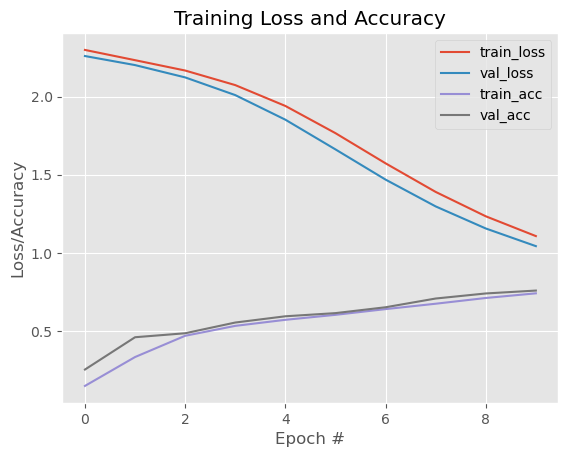

In [10]:
#plotting the training loss and accuracy
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, epochs), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, epochs), H.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, epochs), H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()